## Importing packages

In [1]:
import pandas as pd
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Loading

In [2]:
df = pd.read_csv('sonar.all-data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
df.shape

(208, 61)

We have 208 numbers of Rows
and 61 Numbers of columns

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


## Checking Null Values

In [5]:
print(df.isnull().sum().tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

Out of 208 Rows we have 111 rows, those belon to "Mines Class" where as the remaing that is 97 rows belong to "Rock Class" 

In [7]:
df[60]=df[60].map({"M":0,"R":1})
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1


In [8]:
X = df.drop(60, axis=1)
y = df[60]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [9]:
X_train.shape

(156, 60)

In [10]:
y_train.values

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [11]:
# Converting the split arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [12]:
#Creating Tensor Datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Creating DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

## Training Neural Network

In [13]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(60, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  
        )

    def forward(self, x):
        return self.network(x)

In [14]:
# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=20):
    train_losses, val_losses, val_accuracies = [], [], []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        y_pred, y_true = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                y_pred.extend(predicted.cpu().numpy())
                y_true.extend(labels.cpu().numpy())
        val_losses.append(val_loss / len(val_loader))
        val_accuracy = accuracy_score(y_true, y_pred)
        val_accuracies.append(val_accuracy)
        
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")
    
    return train_losses, val_losses, val_accuracies

Epoch 1/20, Train Loss: 0.6901, Val Loss: 0.6772, Val Accuracy: 0.5192
Epoch 2/20, Train Loss: 0.6790, Val Loss: 0.6610, Val Accuracy: 0.5192
Epoch 3/20, Train Loss: 0.6690, Val Loss: 0.6400, Val Accuracy: 0.5385
Epoch 4/20, Train Loss: 0.6493, Val Loss: 0.6162, Val Accuracy: 0.6538
Epoch 5/20, Train Loss: 0.6176, Val Loss: 0.5984, Val Accuracy: 0.7500
Epoch 6/20, Train Loss: 0.5848, Val Loss: 0.5632, Val Accuracy: 0.7308
Epoch 7/20, Train Loss: 0.5379, Val Loss: 0.5321, Val Accuracy: 0.7500
Epoch 8/20, Train Loss: 0.5014, Val Loss: 0.5467, Val Accuracy: 0.7308
Epoch 9/20, Train Loss: 0.4496, Val Loss: 0.4852, Val Accuracy: 0.7500
Epoch 10/20, Train Loss: 0.4448, Val Loss: 0.6016, Val Accuracy: 0.7692
Epoch 11/20, Train Loss: 0.4452, Val Loss: 0.4751, Val Accuracy: 0.7308
Epoch 12/20, Train Loss: 0.3994, Val Loss: 0.4655, Val Accuracy: 0.7308
Epoch 13/20, Train Loss: 0.3785, Val Loss: 0.5344, Val Accuracy: 0.7692
Epoch 14/20, Train Loss: 0.3934, Val Loss: 0.4724, Val Accuracy: 0.7308
E

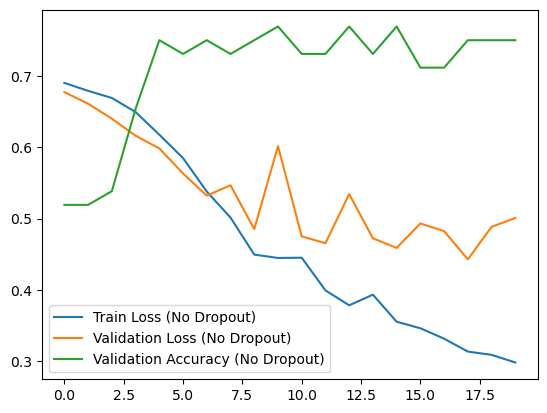

In [15]:
model_without_dropout = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_without_dropout.parameters(), lr=0.001)

train_losses_no_dropout, val_losses_no_dropout, val_accuracies_no_dropout = train_model(
    model_without_dropout, train_loader, test_loader, criterion, optimizer, epochs=20
)

# Plot training and validation loss and accuracy (Without Dropout)
plt.plot(train_losses_no_dropout, label="Train Loss (No Dropout)")
plt.plot(val_losses_no_dropout, label="Validation Loss (No Dropout)")
plt.plot(val_accuracies_no_dropout, label="Validation Accuracy (No Dropout)")
plt.legend()
plt.show()

## Training with dropout Regularization

In [16]:
# Model with Dropout using nn.Sequential
class SimpleNNWithDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(60, 128),
            nn.ReLU(),
            nn.Dropout(p=0.5),  # Dropout layer after the first ReLU
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(p=0.5),  # Dropout layer after the second ReLU
            nn.Linear(64, 2)  # Final output layer without activation for raw logits
        )

    def forward(self, x):
        return self.network(x)

Epoch 1/20, Train Loss: 0.7063, Val Loss: 0.6952, Val Accuracy: 0.4808
Epoch 2/20, Train Loss: 0.6930, Val Loss: 0.6795, Val Accuracy: 0.5385
Epoch 3/20, Train Loss: 0.6804, Val Loss: 0.6678, Val Accuracy: 0.5192
Epoch 4/20, Train Loss: 0.6725, Val Loss: 0.6542, Val Accuracy: 0.5192
Epoch 5/20, Train Loss: 0.6713, Val Loss: 0.6428, Val Accuracy: 0.5192
Epoch 6/20, Train Loss: 0.6530, Val Loss: 0.6345, Val Accuracy: 0.5385
Epoch 7/20, Train Loss: 0.6653, Val Loss: 0.6232, Val Accuracy: 0.5962
Epoch 8/20, Train Loss: 0.6405, Val Loss: 0.6117, Val Accuracy: 0.6538
Epoch 9/20, Train Loss: 0.6227, Val Loss: 0.5962, Val Accuracy: 0.6731
Epoch 10/20, Train Loss: 0.6267, Val Loss: 0.5965, Val Accuracy: 0.7692
Epoch 11/20, Train Loss: 0.5921, Val Loss: 0.5648, Val Accuracy: 0.6923
Epoch 12/20, Train Loss: 0.5800, Val Loss: 0.5611, Val Accuracy: 0.7500
Epoch 13/20, Train Loss: 0.5721, Val Loss: 0.5565, Val Accuracy: 0.8269
Epoch 14/20, Train Loss: 0.5259, Val Loss: 0.5328, Val Accuracy: 0.7115
E

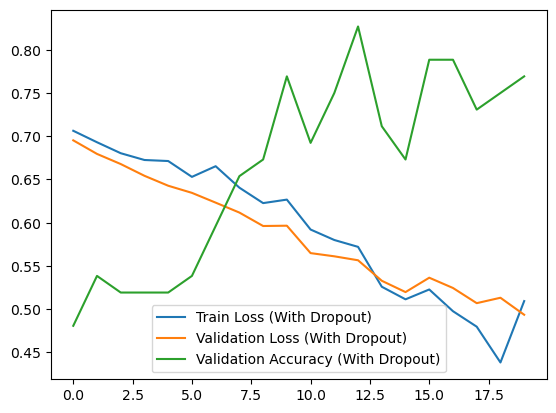

In [17]:
# Initialize and train the model with dropout
model_with_dropout = SimpleNNWithDropout()
optimizer = optim.Adam(model_with_dropout.parameters(), lr=0.001)

train_losses_with_dropout, val_losses_with_dropout, val_accuracies_with_dropout = train_model(
    model_with_dropout, train_loader, test_loader, criterion, optimizer, epochs=20
)

# Plot training and validation loss and accuracy (With Dropout)
plt.plot(train_losses_with_dropout, label="Train Loss (With Dropout)")
plt.plot(val_losses_with_dropout, label="Validation Loss (With Dropout)")
plt.plot(val_accuracies_with_dropout, label="Validation Accuracy (With Dropout)")
plt.legend()
plt.show()

## Train a Neural Network With L2 Regularization

Epoch 1/40, Train Loss: 0.6825, Val Loss: 0.6715, Val Accuracy: 0.5192
Epoch 2/40, Train Loss: 0.6884, Val Loss: 0.6676, Val Accuracy: 0.5192
Epoch 3/40, Train Loss: 0.6806, Val Loss: 0.6642, Val Accuracy: 0.5192
Epoch 4/40, Train Loss: 0.6853, Val Loss: 0.6593, Val Accuracy: 0.5192
Epoch 5/40, Train Loss: 0.6763, Val Loss: 0.6583, Val Accuracy: 0.5192
Epoch 6/40, Train Loss: 0.6816, Val Loss: 0.6580, Val Accuracy: 0.5192
Epoch 7/40, Train Loss: 0.6778, Val Loss: 0.6575, Val Accuracy: 0.5192
Epoch 8/40, Train Loss: 0.6713, Val Loss: 0.6557, Val Accuracy: 0.5192
Epoch 9/40, Train Loss: 0.6736, Val Loss: 0.6535, Val Accuracy: 0.5192
Epoch 10/40, Train Loss: 0.6745, Val Loss: 0.6546, Val Accuracy: 0.5192
Epoch 11/40, Train Loss: 0.6738, Val Loss: 0.6554, Val Accuracy: 0.5385
Epoch 12/40, Train Loss: 0.6707, Val Loss: 0.6563, Val Accuracy: 0.6346
Epoch 13/40, Train Loss: 0.6669, Val Loss: 0.6583, Val Accuracy: 0.7115
Epoch 14/40, Train Loss: 0.6641, Val Loss: 0.6436, Val Accuracy: 0.5192
E

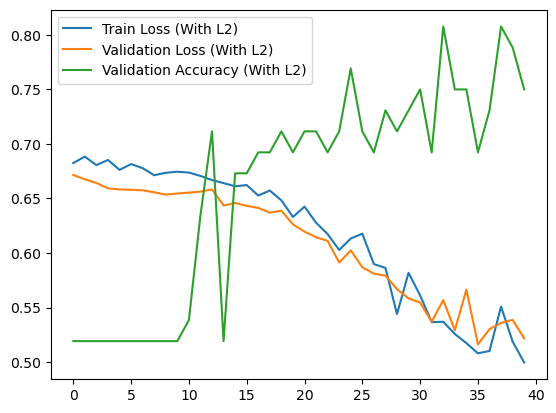

In [18]:
# Initialize and train the model with L2 regularization
model_with_l2 = SimpleNNWithDropout()
optimizer = optim.Adam(model_with_l2.parameters(), lr=0.001, weight_decay=0.04) # weight decay parameter is used for L2 regularization

train_losses_with_l2, val_losses_with_l2, val_accuracies_with_l2 = train_model(
    model_with_l2, train_loader, test_loader, criterion, optimizer, epochs=40
)

# Plot training and validation loss and accuracy (With Dropout)
plt.plot(train_losses_with_l2, label="Train Loss (With L2)")
plt.plot(val_losses_with_l2, label="Validation Loss (With L2)")
plt.plot(val_accuracies_with_l2, label="Validation Accuracy (With L2)")
plt.legend()
plt.show()